## EDA - final training data

Filtering criteria:
1. length of peptides==9
2. HLA should have atleast 10 peptides with atleast 5 pos and neg


In [4]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Read original HLA data
df = pd.read_csv('./Data/Data_HLA.csv',index_col=0)
BA_df = df[df['peptide_length']==9]

# Read count df
count_df = pd.read_csv('./Data/HLA_peptide_count.csv',index_col=0)

# HLA list
# Make sure we have atleast 10 peptides with atleast 5 +ve and -ve peptides
allele_ls = count_df[(count_df['positives']>5)&(count_df['negatives']>5)&(count_df['total']>10)]['allele'].to_list()

# update count_df
count_df = count_df[count_df['allele'].isin(allele_ls)].reset_index(drop=True)

## PLOT

In [7]:
## constants
fontsize=14
dpi = 600
color = 'cornflowerblue'

/tmp/ipykernel_20251/3017671415.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(),fontsize=fontsize-2)
/tmp/ipykernel_20251/3017671415.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels(b.get_yticklabels(),fontsize=fontsize-2)


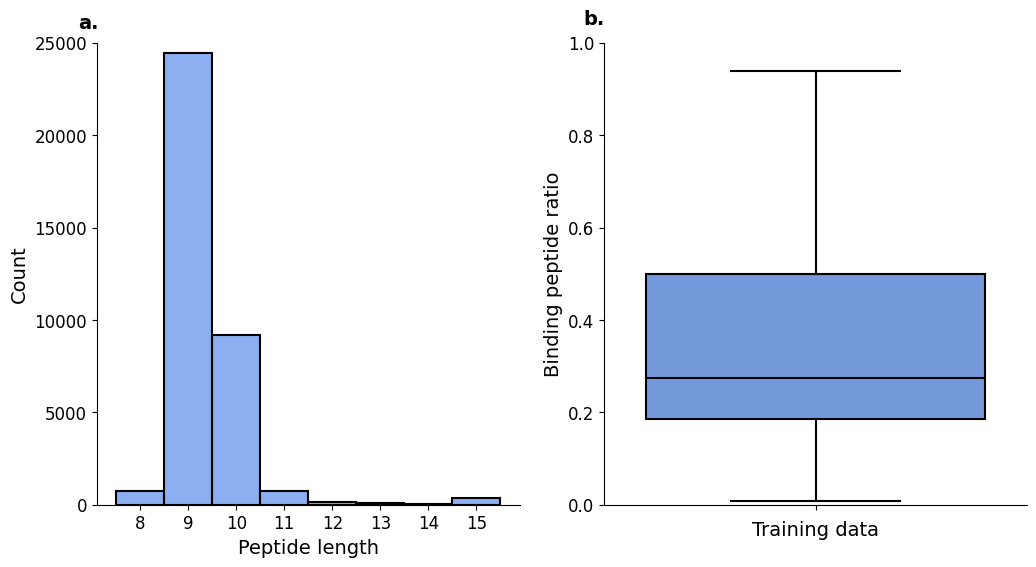

In [9]:
##### Plot of length distribution and positive fraction 

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
### Length distribution
b = sns.histplot(data=df[['peptide_length','peptide']].drop_duplicates('peptide'), 
                 x='peptide_length', color=color, ax=axs[0], linewidth=1.5,
                discrete=True)

# For ticklabels, you need to populate the fig first
plt.draw()

b.set_xticklabels(b.get_xticklabels(),fontsize=fontsize-2)
b.set_yticklabels(b.get_yticklabels(),fontsize=fontsize-2)
b.set_xlabel('Peptide length',fontsize=fontsize)
b.set_ylabel('Count',fontsize=fontsize)

b.set(ylim=(0,25000))
b.text(6.7, 25800, 'a.', weight='bold', fontsize=fontsize)

# ### plot positive ratio distribution
b = sns.boxplot(data=count_df, y='positive_ratio_len9', linewidth=1.5,linecolor='black',
                ax=axs[1], color=color)
b.set_ylabel('Binding peptide ratio', fontsize=fontsize)
# Retrieve and modify existing y-axis tick labels fontsize
yticklabels = axs[1].get_yticklabels()
for label in yticklabels:
    label.set_fontsize(fontsize-2)  # Set fontsize to 12
b.set_xlabel('Training data', fontsize=fontsize)
b.set(ylim=(0,1))
sns.despine(top=True, right=True)

b.text(-0.55, 1.04, 'b.', weight='bold', fontsize=fontsize)

fig.savefig('./figures/EDA/peptide_eda_training.png',dpi=dpi, bbox_inches='tight')


/tmp/ipykernel_20251/3115384134.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)
/tmp/ipykernel_20251/3115384134.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)


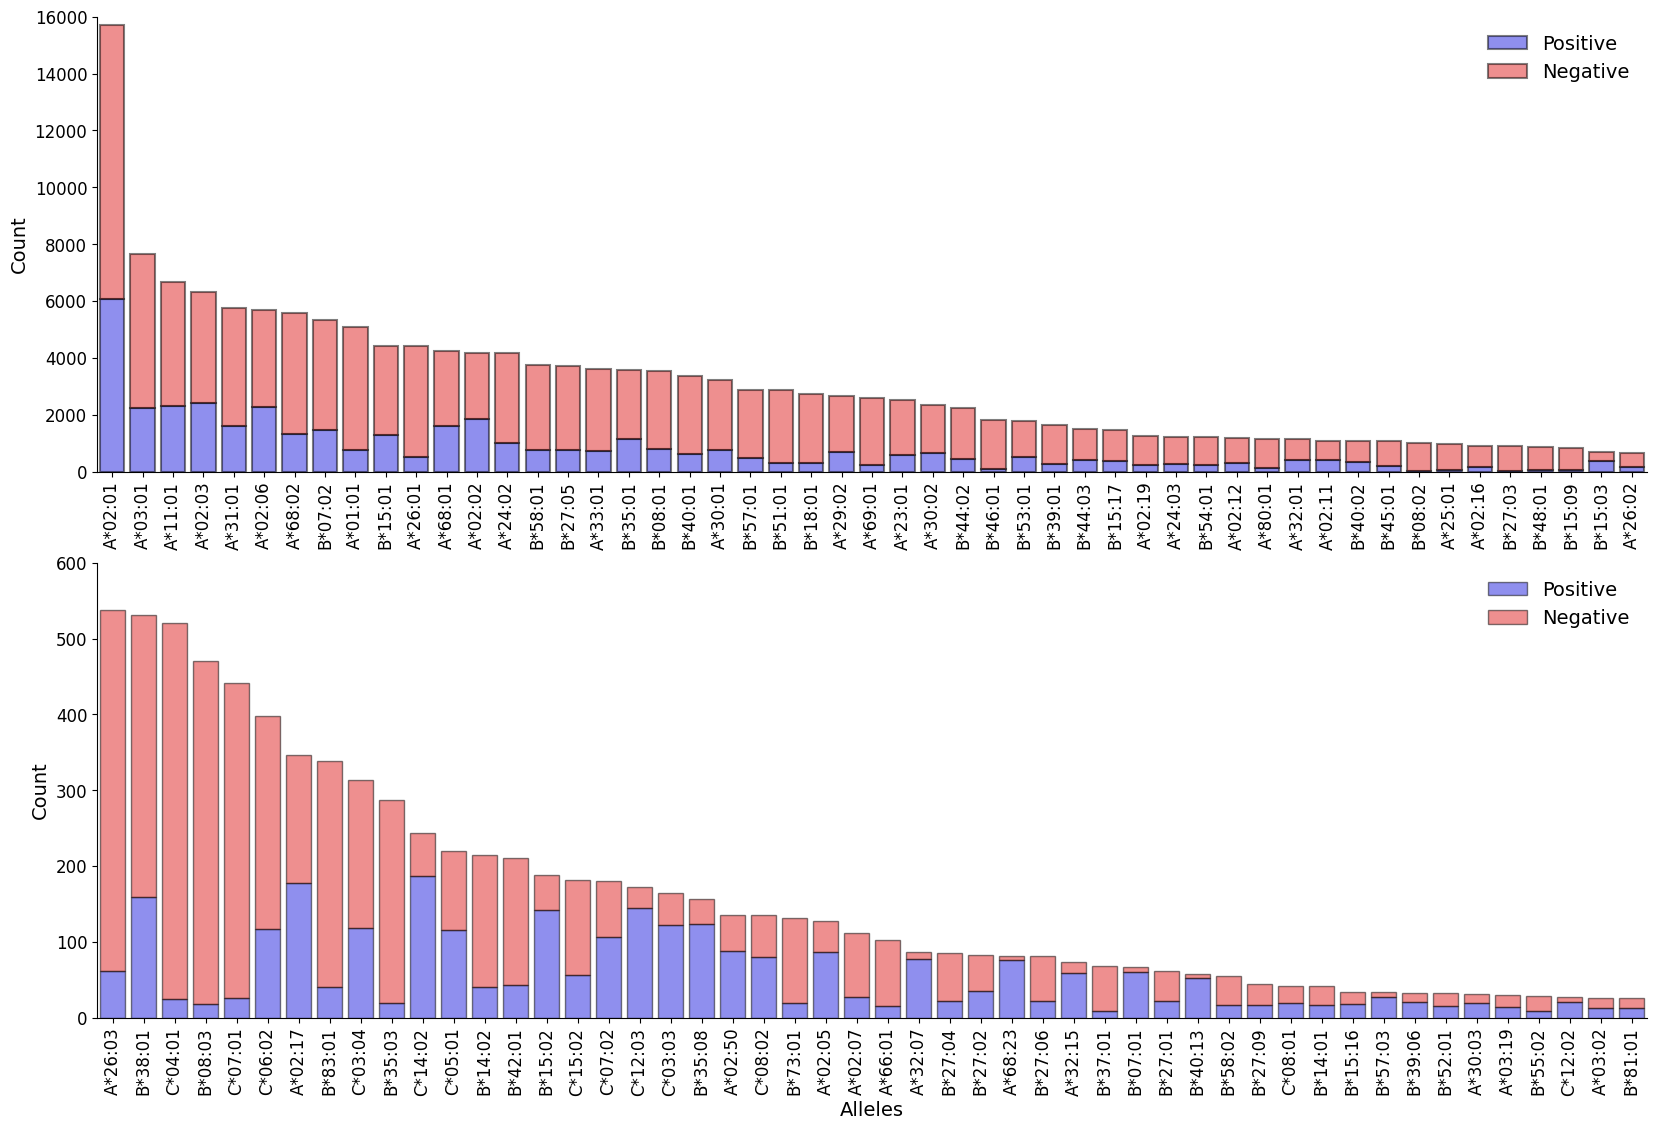

In [10]:
# Plot HLA counts distribution

fig,axs = plt.subplots(nrows=2, ncols=1, figsize=(20,13))

###### top half

top_half_df = count_df.iloc[0:51]

# Plotting positive counts
b = sns.barplot(data=top_half_df, x='allele', y='positives', color='b', alpha=0.5, edgecolor='black', 
            label='Positive', ax=axs[0], linewidth=1.5)


# Plotting negative counts
sns.barplot(data=top_half_df, x='allele', y='negatives', color='r', alpha=0.5, edgecolor='black',
            label='Negative', bottom=top_half_df['positives'], ax=b, linewidth=1.5)

# Adding labels 
# Retrieve and modify existing y-axis tick labels fontsize
yticklabels = axs[0].get_yticklabels()
for label in yticklabels:
    label.set_fontsize(fontsize-2)  # Set fontsize to 12
    
xticklabels = [i.get_text()[4:] for i in b.get_xticklabels()]
b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)

b.set(ylim=(0,16000))
axs[0].set_xlabel('',fontsize=fontsize)
axs[0].set_ylabel('Count',fontsize=fontsize)

axs[0].legend(frameon=False, fontsize=fontsize,)
sns.despine(top=True, right=True)

###### lower half
bottom_half_df = count_df.iloc[51:]

# Plotting positive counts
b = sns.barplot(data=bottom_half_df, x='allele', y='positives', color='b', alpha=0.5, edgecolor='black', 
            label='Positive', ax=axs[1])


# Plotting negative counts
sns.barplot(data=bottom_half_df, x='allele', y='negatives', color='r', alpha=0.5, edgecolor='black',
            label='Negative', bottom=bottom_half_df['positives'], ax=b)

# Adding labels 
# Retrieve and modify existing y-axis tick labels fontsize
yticklabels = axs[1].get_yticklabels()
for label in yticklabels:
    label.set_fontsize(fontsize-2)  # Set fontsize to 12
    
xticklabels = [i.get_text()[4:] for i in b.get_xticklabels()]
b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)
b.set(ylim=(0,600))

axs[1].set_xlabel('Alleles',fontsize=fontsize)
axs[1].set_ylabel('Count',fontsize=fontsize)

axs[1].legend(frameon=False, fontsize=fontsize,)
sns.despine(top=True, right=True)


fig.savefig('./figures/EDA/HLA_count_distribution_final_training.png',dpi=dpi, bbox_inches='tight')